In [136]:
import pandas as pd
from pandas import datetime
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from statsmodels.graphics.tsaplots import plot_acf
import warnings
warnings.filterwarnings('ignore')

In [103]:
def parser(x):
    return datetime.strptime(x, '%Y-%m')

sales = pd.read_csv("sales-cars.csv", date_parser = parser, parse_dates=[0], index_col=0)
sales.head()

,Sales
Month,
2016-01-01,266
2016-02-01,146
2016-03-01,183
2016-04-01,119
2016-05-01,180


In [104]:
#sales.Month[5]

<AxesSubplot:xlabel='Month'>

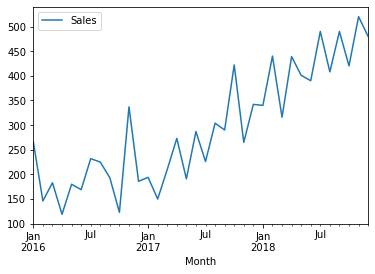

In [105]:
sales.plot()

In [106]:
# we have to convery it into Stationary
sales.head()

,Sales
Month,
2016-01-01,266
2016-02-01,146
2016-03-01,183
2016-04-01,119
2016-05-01,180


In [107]:
sales_diff = sales.diff(periods=1) # integrated of order 1. Its denoted by d (for difference). It is parameter of ARIMA
sales_diff = sales_diff[1:] #1st row sales NAN. We have to remove it
sales_diff.head()

,Sales
Month,
2016-02-01,-120.0
2016-03-01,37.0
2016-04-01,-64.0
2016-05-01,61.0
2016-06-01,-11.0


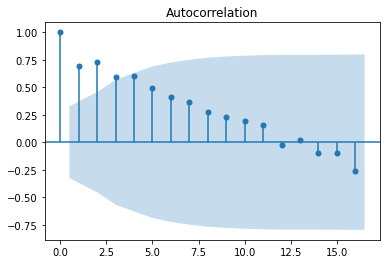

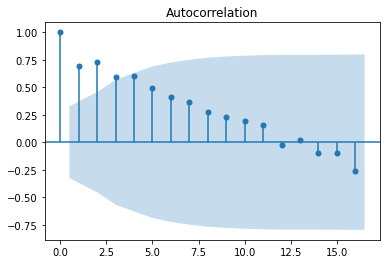

In [108]:
# Auto Corelation function [ACF Plot] to check data we have stationary or not
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(sales)

In [109]:
# It shows data is not stationary

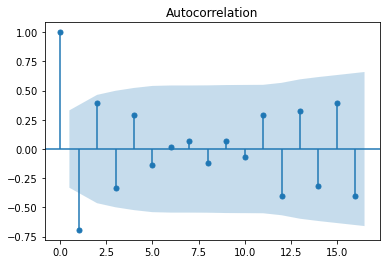

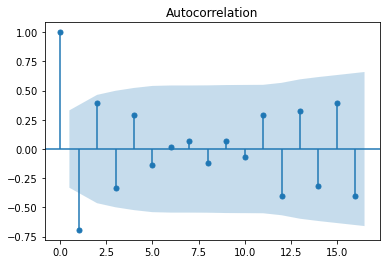

In [110]:
plot_acf(sales_diff)

<AxesSubplot:xlabel='Month'>

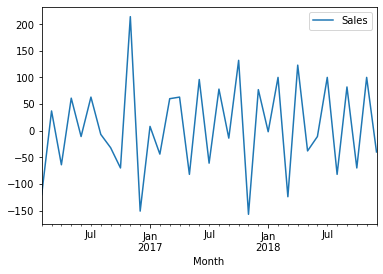

In [111]:
sales_diff.plot()

In [112]:
X = sales.values
train = X[0:27] # 27 data to train
test = X[26:]   # 9 data to Test
predictions = []

In [113]:
train.size
test.size

10

In [114]:
# AR(Auto Regressor Model)
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
model_ar = AR(train)
model_ar_fit = model_ar.fit()

In [115]:
predictions_AR = model_ar_fit.predict(start=27, end=36)

Text(0.5, 0, 'Difference between Actual and predicted Sales')

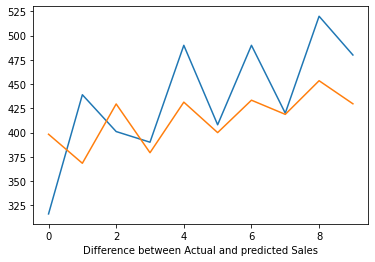

In [116]:
plt.plot(test)
plt.plot(predictions_AR)
plt.xlabel ("Difference between Actual and predicted Sales")

<AxesSubplot:xlabel='Month'>

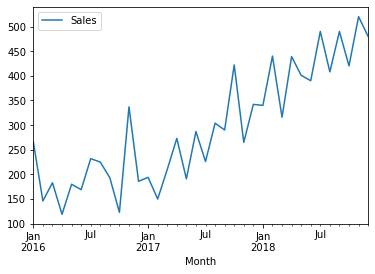

In [117]:
sales.plot()

In [133]:
# ARIMA Model 
from statsmodels.tsa.arima_model import ARIMA                  # p = periods taken for AR--Number of time taken previously
model_arima = ARIMA(train,order=(9,1,0))                       # d = How many times difference is done (1 or 2 good value)
model_arima_fit = model_arima.fit()                            # q = Number of periods lag in the model    
print(model_arima_fit.aic)

299.1306048893182


In [134]:
predictions_arima = model_arima_fit.forecast(steps=10)[0]   # In ARIMA we have to mention forecast, [0] shows which column to take
predictions_arima

array([382.36206552, 346.01892152, 408.2468767 , 374.59750042,
       440.58846696, 354.09797342, 413.03911553, 415.78065919,
       483.76031164, 393.70126882])

Text(0.5, 0, 'Difference between Actual and predicted Sales')

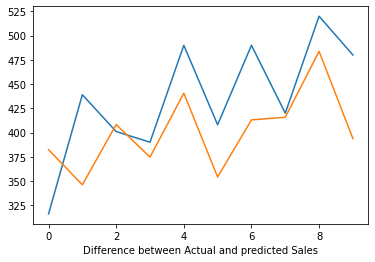

In [135]:
plt.plot(test)
plt.plot(predictions_arima)
plt.xlabel ("Difference between Actual and predicted Sales")

In [132]:
# to check best p,d,q value. Then put the values in the Base ARIMA Model and to hit and trial.
import itertools
p=d=q=range(0,10)
pdq = list(itertools.product(p,d,q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 0, 5),
 (0, 0, 6),
 (0, 0, 7),
 (0, 0, 8),
 (0, 0, 9),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 1, 5),
 (0, 1, 6),
 (0, 1, 7),
 (0, 1, 8),
 (0, 1, 9),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 2, 5),
 (0, 2, 6),
 (0, 2, 7),
 (0, 2, 8),
 (0, 2, 9),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (0, 3, 4),
 (0, 3, 5),
 (0, 3, 6),
 (0, 3, 7),
 (0, 3, 8),
 (0, 3, 9),
 (0, 4, 0),
 (0, 4, 1),
 (0, 4, 2),
 (0, 4, 3),
 (0, 4, 4),
 (0, 4, 5),
 (0, 4, 6),
 (0, 4, 7),
 (0, 4, 8),
 (0, 4, 9),
 (0, 5, 0),
 (0, 5, 1),
 (0, 5, 2),
 (0, 5, 3),
 (0, 5, 4),
 (0, 5, 5),
 (0, 5, 6),
 (0, 5, 7),
 (0, 5, 8),
 (0, 5, 9),
 (0, 6, 0),
 (0, 6, 1),
 (0, 6, 2),
 (0, 6, 3),
 (0, 6, 4),
 (0, 6, 5),
 (0, 6, 6),
 (0, 6, 7),
 (0, 6, 8),
 (0, 6, 9),
 (0, 7, 0),
 (0, 7, 1),
 (0, 7, 2),
 (0, 7, 3),
 (0, 7, 4),
 (0, 7, 5),
 (0, 7, 6),
 (0, 7, 7),
 (0, 7, 8),
 (0, 7, 9),
 (0, 8, 0),
 (0, 8, 1),
 (0, 8, 2),
 (0,

In [125]:
# Check which values is minimum
for param in pdq:
    try:
        
        model_arima = ARIMA(train,order=param)                       
        model_arima_fit = model_arima.fit()     
        print(param,model_arima_fit.aic)
    except:
        continue

(0, 0, 0) 319.45285852307086
(0, 0, 1) 318.7244809435192
(0, 0, 2) 315.25060028892415
(0, 0, 3) nan
(0, 0, 4) nan
(0, 0, 5) nan
(0, 0, 6) 310.8823853855728
(0, 0, 7) nan
(0, 0, 8) 309.30784170408003
(0, 0, 9) 311.18003281814026
(0, 1, 0) 311.8293983488534
(0, 1, 1) 296.0841522437922
(0, 1, 2) 296.32292269077635
(0, 1, 3) 298.3120211738975
(0, 1, 4) 300.3393975618181
(0, 1, 5) 295.4809944892011
(0, 1, 6) 297.8026116819636
(0, 1, 7) nan
(0, 1, 8) 300.22180620548954
(0, 1, 9) 299.47043497755516
(0, 2, 0) 329.1834958250828
(0, 2, 1) 306.1019474419569
(0, 2, 2) 290.39835677847316
(0, 2, 3) 292.98589189529685
(0, 2, 5) 297.0497408608362
(0, 2, 6) 291.34407567137015
(0, 2, 7) 293.466997232632
(0, 2, 8) 291.18761508547465
(0, 2, 9) 299.3233021111215
(1, 0, 0) 316.16687175222717
(1, 0, 1) 313.0487174467161
(1, 0, 2) 310.9790642313255
(1, 1, 0) 298.8325442270745
(1, 1, 1) 297.12565112584986
(1, 1, 2) 299.47166670627297
(1, 1, 3) 301.2851180954895
(1, 1, 4) 299.97873239729114
(1, 2, 0) 306.530776